Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   
PEC00025: Introdução à Teoria de Vibrações

# Trabalho 01: Resposta de um sistema de um grau de liberdade a uma excitação na base: espectro de pseudo acelerações.

Nome: Otávio Augusto Peter de Souza   
Matrícula: 00312138

[1. Introdução](#section_1)   
[2. Definição e cálculo das propriedades iniciais do sistema](#section_2)   
[3. Registro de acelerações do sistema](#section_3)   
[4. Elaboração do periodograma de entrada](#section_4)   
[5. Cálculo dos deslocamentos através do Método de Duhamel](#section_5)   
[6. Construção do espectro de pseudo acelerações](#section_6)   
[7. Elaboração do periodograma de saída](#section_7)   
[8. Conclusões](#section_8)

In [1]:
# Importando os módulos do Python necessários para este notebook
# (Esta célula deve ser executada com "shift + enter" antes de qualquer outra célula Python)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

## 1. Introdução <a name="section_1"></a>   

O presente trabalho tem como objetivo principal a elaboração de um espectro de resposta de pseudo-acelerações, provocadas pela excitação com variação arbitrária no tempo de um sistema de um grau de liberade. Além do espectro também serão construídos periodogramas de acelerações e deslocamentos do sistema.   

Para a realização deste trabalho foi aplicada uma excitação dinâmica em um sistema fictício com a finalidade de obter-se registros da aceleração ao longo do tempo. Tendo em mãos os valores de aceleração em determnado intervalo de tempo, bem como alguns outros dados do sistema analisado, elabora-se o espectro de resposta de pseudo-acelerações e os periodogramas.

## 2. Definição e cálculo das propriedades iniciais do sistema <a name="section_2"></a>   

A seguir são definidas e calculadas algumas propriedades do sistema a ser analisado. A massa $m$ em quilogramas, a frequência natural de vibração $f_n$ em Hertz, o amortecimento $\zeta$, o deslocamento inicial $u_0$ em metros e a velocidade inicial $v_0$ em metros por segundo. Em posse desstes dados, foi calculada a rigidez $k$ do sistema.

In [2]:
m  = 1.0                   # massa do sistema em Kg
fn = 1.0                   # frequência natural em Hz
zt = 0.01                  # amortecimento crítico
u0 = 0.                    # deslocamento inicial
v0 = 0.                    # velocidade inicial

k = m*(2*np.pi*fn)**2      # cálculo da rigidez

## 3. Registro de acelerações do sistema <a name="section_3"></a>

Para a geração dos dados que permitiram o desenvolvimento deste trabalho foi utilizado o aplicativo de celular iNVH. Colocou-se o aparelho celular suspenso sobre elásticos e, após um impulso, registrou-se as vibrações do sistema criado.   

Os gráficos a seguir ilustram o comportamento das acelerações registradas ao longo do tempo, em relação a três direções perpendiculares entre si: A aceleração $acc1$ corresponde à direção $X$, a aceleração $acc2$ à direção $Y$ enquanto que a aceleração $acc3$ à direção $Z$

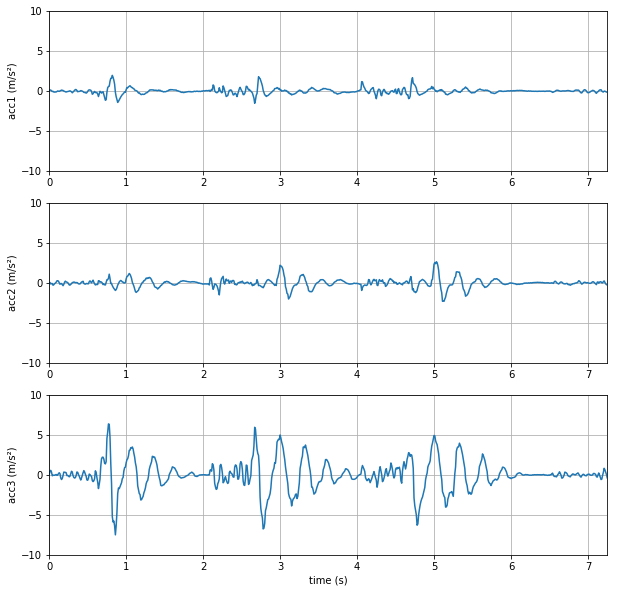

In [3]:
data = MRPy.from_file('DATA/elasticoof2', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(10, 10), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-10, 10);
    plt.ylabel('acc{0} (m/s²)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Devido ao fato de os dados mais relevantes neste trabalho serem apenas as vibrações verticais do sistema, apresenta-se abaixo unicamente o gráfico que registrou a aceleração $acc3$ ao longo do tempo, sendo esta relacionada à direção vertical $Z$.

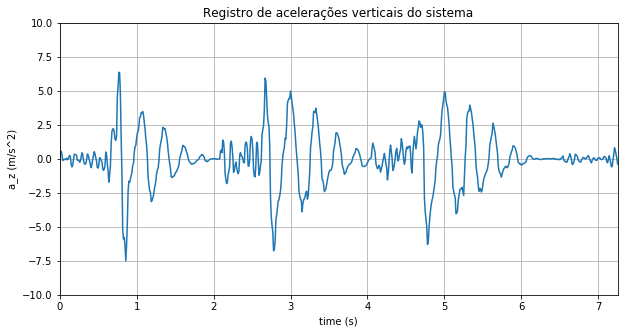

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(10, 5), clear=True)
plt.title("Registro de acelerações verticais do sistema")
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-10, 10);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

## 4. Elaboração do periodograma de entrada <a name="section_4"></a>

Em posse dos dados apresentados no item anterior, referentes à aceleração do sistema na direção $Z$ em relação ao tempo, é possível elaborar o periodograma de acelerações do sistema, ou periodograma dos dados de entrada.

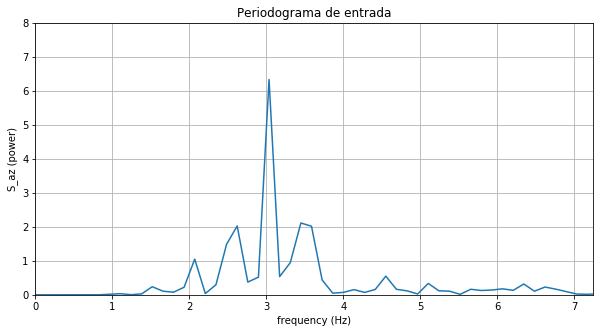

In [5]:
Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(3, figsize=(10, 5), clear=True)
plt.title("Periodograma de entrada")
plt.plot(f, Saz[0])

plt.xlim(0, az.Td);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  8);   plt.ylabel('S_az (power)') 

plt.grid(True)

## 5. Cálculo de deslocamentos através do Método de Duhamel <a name="section_5"></a>

Para efetivar-se o cálculo dos deslocamentos do sistema ao longo do tempo, foi aplicado o Método de Duhamel. O gráfico com o resultado obtido é apresentado a seguir.

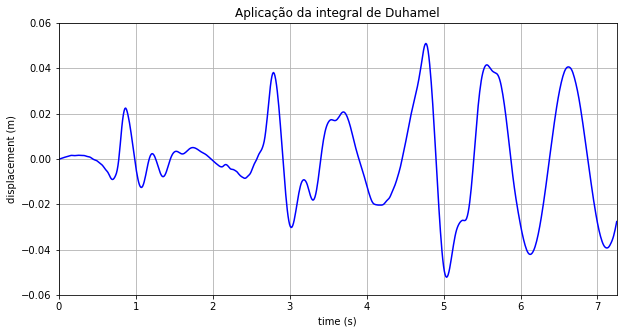

In [6]:
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(4, figsize=(10, 5), clear=True)
plt.title("Aplicação da integral de Duhamel")
plt.plot(t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.06, 0.06);   plt.ylabel('displacement (m)') 

plt.grid(True) 

## 6. Construção do espectro de pseudo-acelerações <a name="section_7"></a>

O espectro de pseudo-acelerações será um gráfico que relaciona a aceleração máxima, ou aceleração de pico à uma frequência natural de vibração. A seguir apresenta-se o processo detalhado da obtenção de um dos pontos do espectro, utilizando-se como dados as definições atribuídas no item 2 deste trabalho.   

Primeiramete deve-se localizar o deslocamento máximo, também chamado de deslocamento de pico, no gráfico dos deslocamentos apresentado no item 5 deste trabalho. Calcula-se a seguir a aceleração de pico $a_p$ para este deslocamento máximo através da equação:   

Onde:   

Por fim, calcula-se o período natural de vibração $T_n$ correspondente à aceleração de pico já calculada, através da equação:   

Tem-se então o ponto $(T_n, a_p)$, pertencente ao espectro de pseudo-acelerações quando considera-se os valores pré-definidos para as propriedades do sistema.

In [7]:
y = u_DH

ymax = y.max()

ymin = y.min()

if ymax > np.abs(ymin):
    ypico = ymax
else:
    ypico = np.abs(ymin)

print ("O deslocamento máximo é", ypico, "m")

O deslocamento máximo é 0.0522372918995659 m


In [8]:
import math

wn = math.sqrt(k/m)
ap = (wn**2)*ypico
Tn = (2*np.pi)/wn

print ("A aceleração de pico para o deslocamento máximo é", ap, "m²/s")
print ("O período natural correspondente à aceleração de pico é", Tn, "s")

A aceleração de pico para o deslocamento máximo é 2.0622456241317804 m²/s
O período natural correspondente à aceleração de pico é 1.0 s


Para a construção do gráfico do espectro de pseudo-acelerações é necessário, primeiramente, definir qual faixa de valores será apresentada para em seguida obter-se um determinado número de pontos $(T_n, a_p)$, componentes do espectro. Para a obtenção destes pontos é necessário variar o valor de $w_n$. Ressalta-se que, para cada valor de $w_n$ considerado, será gerado um novo ponto $(T_n, a_P)$ no espectro.   

Como o valor de $w_n$ é definido em função do valor da frequência natural $f_n$, a obtenção de inúmeros valores de $w_n$ só será possível variando-se o valor de $f_n$.   

A seguir, os processos já detalhados neste trabalho foram refeitos para 120 valores de $f_n$, sendo que o valor inicial foi definido como $0,1 Hz$ e cada novo valor correspone ao valor anterior acrescido de $0,5 Hz$. O gráfico gerado com estes 120 pontos é apresentado na sequência.

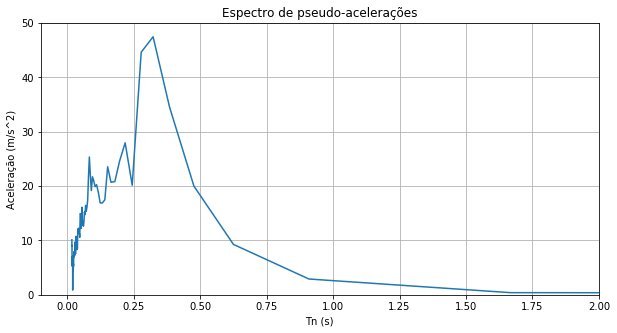

In [9]:
m  = 1.0       # system mass in kg
fn = 0.1       # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity
n = 120

TN = np.zeros(n)
AP = np.zeros(n)

for x in range(0,n):
    k = m*(2*np.pi*fn)**2
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
    y = u_DH
    ymax = y.max()
    ymin = y.min()
    if ymax > np.abs(ymin):
        ypico = ymax
    else:
        ypico = np.abs(ymin)
    wn = math.sqrt(k/m)
    AP[x] = (wn**2)*ypico
    TN[x] = 1/fn
    
    fn = fn+0.5

plt.figure(6, figsize=(10, 5), clear=True)
plt.title("Espectro de pseudo-acelerações")
plt.plot(TN, AP)

plt.xlim(-0.1, 2);        plt.xlabel('Tn (s)') 
plt.ylim(0, 50);   plt.ylabel('Aceleração (m/s^2)') 

plt.grid(True)

## 7. Elaboração do periodograma de saída <a name="section_6"></a>

Elabora-se, por fim, o periodograma de deslocamentos,  utilizando-se os dados de saída, obtidos após a aplicação do Método de Duhamel. Assim como no periodograma de entrada, há um pico no periodograma de saída, o que sugere que a frequência natural de vibração do sistema analisado seja exatamente a frequência em que este pico ocorre, que é um valor próximo próximo de $3Hz$.

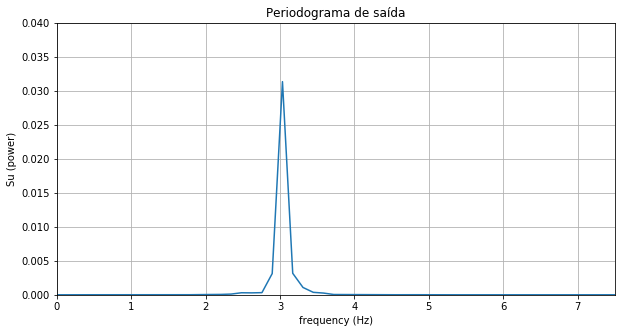

In [10]:
xmax = f[np.argmax(Saz[0])]

for x in range(0,n):
    u_DH = az.sdof_Duhamel(xmax, zt, u0, v0)/m

Su, fs = u_DH.periodogram()
f       = u_DH.f_axis()

plt.figure(5, figsize=(10, 5), clear=True)
plt.title("Periodograma de saída")
plt.plot(f, Su[0])

plt.xlim(0, 7.5);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.04);   plt.ylabel('Su (power)') 

plt.grid(True)

## 8. Conclusões <a name="section_8"></a>

No presente trabalho foram construídos o espectro de pseudo-acelerações e os periodogramas de acelerações e deslocamentos de um sistema de um grau de liberdade quando o mesmo é submetido a vibrações.   

A realização do trabalho exigiu a aplicação prática de equações e conceitos abordados na disciplina de Introdução à Teoria de Vibrações, permitindo assim uma melhor compreensão dos tópicos estudados referida disciplina.